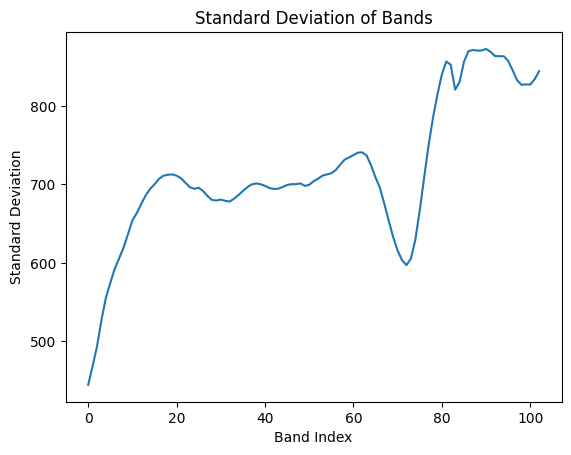

The band with maximum information is Band 91


In [ ]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt

PaviaU_data = loadmat('/content/PaviaU.mat')
PaviaU = PaviaU_data['paviaU']

reshaped_data = np.reshape(PaviaU, (PaviaU.shape[0] * PaviaU.shape[1], PaviaU.shape[2]))
band_std_dev = np.std(reshaped_data, axis=0)
max_info_band = np.argmax(band_std_dev)

plt.plot(band_std_dev)
plt.xlabel('Band Index')
plt.ylabel('Standard Deviation')
plt.title('Standard Deviation of Bands')
plt.show()

print(f"The band with maximum information is Band {max_info_band + 1}")

In [ ]:
PaviaU_data = loadmat('/content/PaviaU.mat')
keys = PaviaU_data.keys()
print(keys)
print(PaviaU_data)

dict_keys(['__header__', '__version__', '__globals__', 'paviaU'])
{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Fri May 20 18:21:46 2011', '__version__': '1.0', '__globals__': [], 'paviaU': array([[[ 647,  499,  464, ..., 3221, 3238, 3250],
        [ 604,  546,  527, ..., 2442, 2464, 2528],
        [ 621,  746,  556, ..., 2308, 2345, 2361],
        ...,
        [ 524,  525,  598, ..., 2936, 2940, 2950],
        [ 528,  330,   70, ..., 2737, 2774, 2829],
        [ 711,  483,  423, ..., 2562, 2539, 2488]],

       [[ 705,  681,  668, ..., 2607, 2607, 2609],
        [ 891,  692,  453, ..., 1581, 1561, 1522],
        [ 547,  511,  604, ..., 1535, 1531, 1538],
        ...,
        [1149,  658,  434, ..., 3247, 3251, 3277],
        [ 917, 1004,  743, ..., 2828, 2806, 2808],
        [1037,  849,  547, ..., 2491, 2527, 2522]],

       [[1084,  875,  706, ..., 2108, 2167, 2183],
        [ 335,  517,  611, ..., 1105, 1109, 1095],
        [1042,  683,  318, ...,  806,  791,

Lacunarity for Band 91 is: 333.20096836650583


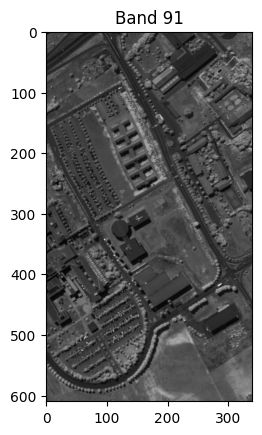

In [ ]:
from scipy.ndimage import variance

band_91 = PaviaU[:, :, 91]
lacunarity_value = variance(band_91)/np.mean(band_91)
print(f"Lacunarity for Band 91 is: {lacunarity_value}")
plt.imshow(band_91, cmap='gray')
plt.title('Band 91')
plt.show()

Gliding Box Lacunarity for Band 91 with box size 2: -0.10984814931596455
Gliding Box Lacunarity for Band 91 with box size 4: -1.5646462377333628
Gliding Box Lacunarity for Band 91 with box size 8: 0.19384005507614704
Gliding Box Lacunarity for Band 91 with box size 16: 10.809935119860354
Gliding Box Lacunarity for Band 91 with box size 32: -3.390663389042092


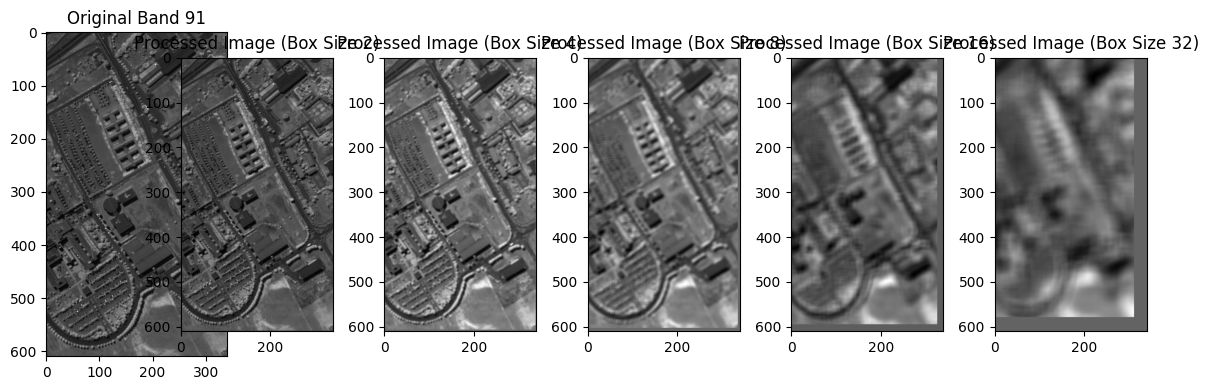

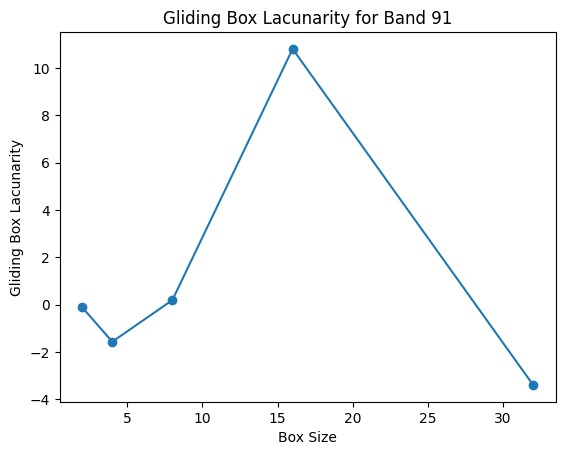

In [ ]:
from sklearn.preprocessing import StandardScaler

band_number = 91
selected_band = PaviaU[:, :, band_number]
selected_band_normalized = StandardScaler().fit_transform(selected_band.reshape(-1, 1)).reshape(selected_band.shape)
box_sizes = [2, 4, 8, 16, 32]

def gliding_box_lacunarity(data, box_sizes):
    lacunarity_values = []
    processed_images = []

    for size in box_sizes:
        lacunarity_map = np.zeros_like(data)
        processed_image = np.zeros_like(data)

        for i in range(data.shape[0] - size + 1):
            for j in range(data.shape[1] - size + 1):
                sub_img = data[i:i+size, j:j+size]
                unique_labels = np.unique(sub_img)
                if 0 in unique_labels:
                    unique_labels = unique_labels[1:]
                lacunarity_map[i, j] = np.var(unique_labels)/np.mean(unique_labels)
                processed_image[i, j] = np.mean(sub_img)

        lacunarity_values.append(np.mean(lacunarity_map))
        processed_images.append(processed_image)

    return lacunarity_values, processed_images

lacunarity_values, processed_images = gliding_box_lacunarity(selected_band_normalized, box_sizes)

for i, size in enumerate(box_sizes):
    print(f"Gliding Box Lacunarity for Band {band_number} with box size {size}: {lacunarity_values[i]}")

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(selected_band_normalized, cmap='gray')
plt.title(f'Original Band {band_number}')

for i, size in enumerate(box_sizes):
    plt.subplot(1, len(box_sizes) + 1, i+2)
    plt.imshow(processed_images[i], cmap='gray')
    plt.title(f'Processed Image (Box Size {size})')

plt.tight_layout()
plt.show()

plt.plot(box_sizes, lacunarity_values, marker='o')
plt.xlabel('Box Size')
plt.ylabel('Gliding Box Lacunarity')
plt.title(f'Gliding Box Lacunarity for Band {band_number}')
plt.show()

Gliding Box Lacunarity for Band 91 with box size 2: 0.1022154870982136
Gliding Box Lacunarity for Band 91 with box size 4: 0.2693427777673692
Gliding Box Lacunarity for Band 91 with box size 8: 0.46548145649444833
Gliding Box Lacunarity for Band 91 with box size 16: 0.6420572576450907
Gliding Box Lacunarity for Band 91 with box size 32: 0.7809975281919931


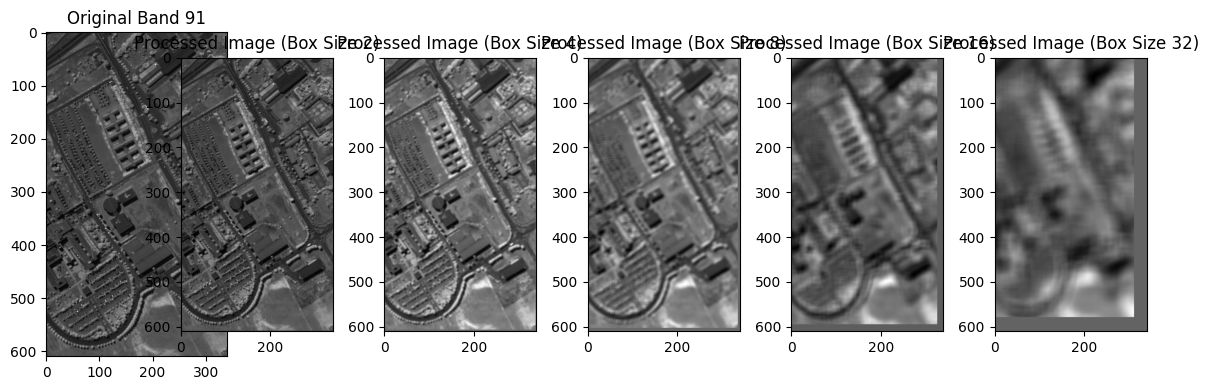

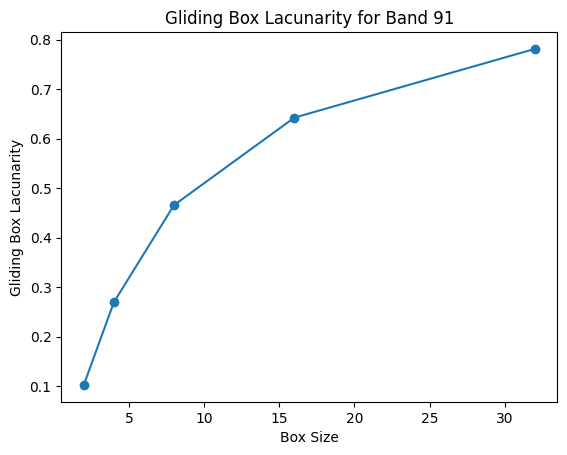

In [ ]:

selected_band = PaviaU[:, :, band_number]
selected_band_normalized = StandardScaler().fit_transform(selected_band.reshape(-1, 1)).reshape(selected_band.shape)

box_sizes = [2, 4, 8, 16, 32]

def gliding_box_lacunarity(data, box_sizes):
    lacunarity_values = []
    processed_images = []

    for size in box_sizes:
        lacunarity_map = np.zeros_like(data)
        processed_image = np.zeros_like(data)

        for i in range(data.shape[0] - size + 1):
            for j in range(data.shape[1] - size + 1):
                sub_img = data[i:i+size, j:j+size]
                unique_labels = np.unique(sub_img)
                if 0 in unique_labels:
                    unique_labels = unique_labels[1:]
                lacunarity_map[i, j] = np.var(unique_labels)
                processed_image[i, j] = np.mean(sub_img)

        lacunarity_values.append(np.mean(lacunarity_map))
        processed_images.append(processed_image)

    return lacunarity_values, processed_images

lacunarity_values, processed_images = gliding_box_lacunarity(selected_band_normalized, box_sizes)

for i, size in enumerate(box_sizes):
    print(f"Gliding Box Lacunarity for Band {band_number} with box size {size}: {lacunarity_values[i]}")

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(selected_band_normalized, cmap='gray')
plt.title(f'Original Band {band_number}')

for i, size in enumerate(box_sizes):
    plt.subplot(1, len(box_sizes) + 1, i+2)
    plt.imshow(processed_images[i], cmap='gray')
    plt.title(f'Processed Image (Box Size {size})')

plt.tight_layout()
plt.show()

plt.plot(box_sizes, lacunarity_values, marker='o')
plt.xlabel('Box Size')
plt.ylabel('Gliding Box Lacunarity')
plt.title(f'Gliding Box Lacunarity for Band {band_number}')
plt.show()

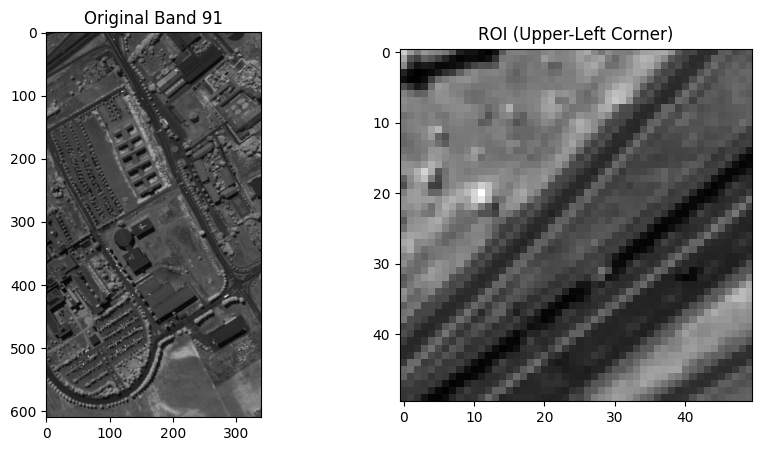

In [ ]:
band_91= PaviaU[:, :, band_number]

x, y, roi_width, roi_height = 0, 0, 50, 50
roi = band_91[y:y+roi_height, x:x+roi_width]

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(band_91, cmap='gray')
plt.title('Original Band 91')

plt.subplot(1, 2, 2)
plt.imshow(roi, cmap='gray')
plt.title('ROI (Upper-Left Corner)')
plt.show()

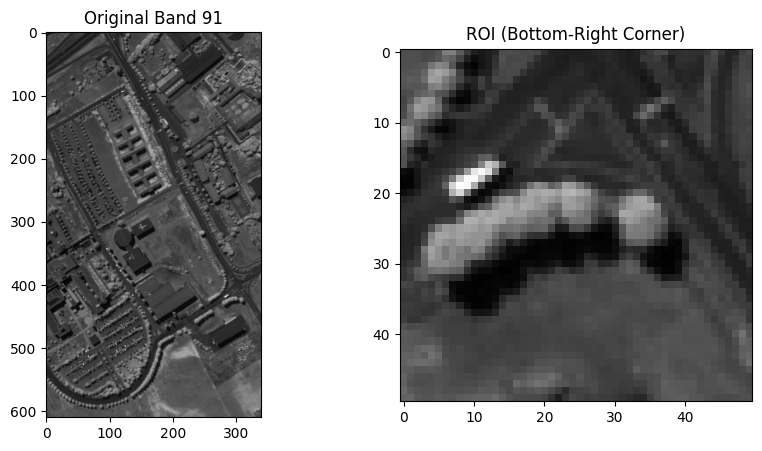

In [ ]:
band_91 = PaviaU[:, :, band_number]

x, y, roi_width, roi_height = 275, 400, 50, 50
roi = band_91[y:y+roi_height, x:x+roi_width]

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(band_91, cmap='gray')
plt.title('Original Band 91')

plt.subplot(1, 2, 2)
plt.imshow(roi, cmap='gray')
plt.title('ROI (Bottom-Right Corner)')
plt.show()

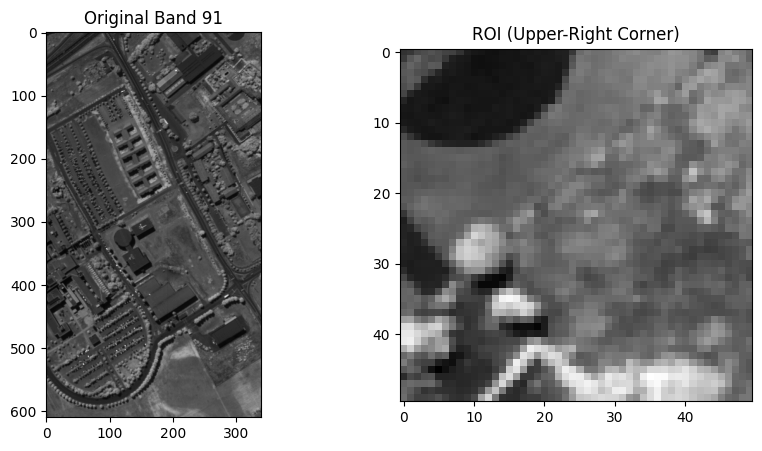

In [ ]:
band_91 = PaviaU[:, :, band_number]

height, width = band_91.shape
roi_width, roi_height = 50, 50
x = width - roi_width
y = 0
roi = band_91[y:y+roi_height, x:x+roi_width]

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(band_91, cmap='gray')
plt.title('Original Band 91')

plt.subplot(1, 2, 2)
plt.imshow(roi, cmap='gray')
plt.title('ROI (Upper-Right Corner)')
plt.show()

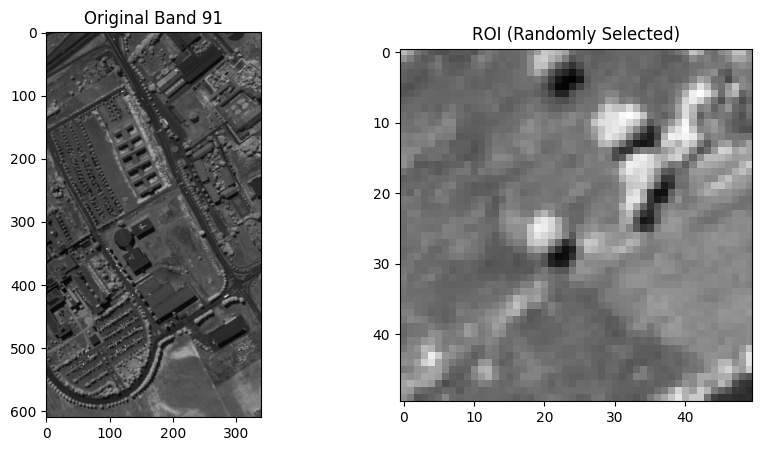

In [ ]:

band_91 = PaviaU[:, :, band_number]

x, y, roi_width, roi_height = 20, 70, 50, 50

roi = band_91[y:y+roi_height, x:x+roi_width]

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(band_91, cmap='gray')
plt.title('Original Band 91')

plt.subplot(1, 2, 2)
plt.imshow(roi, cmap='gray')
plt.title('ROI (Randomly Selected)')
plt.show()

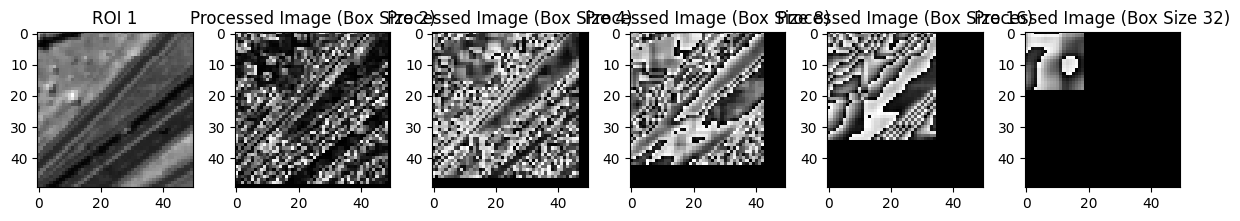

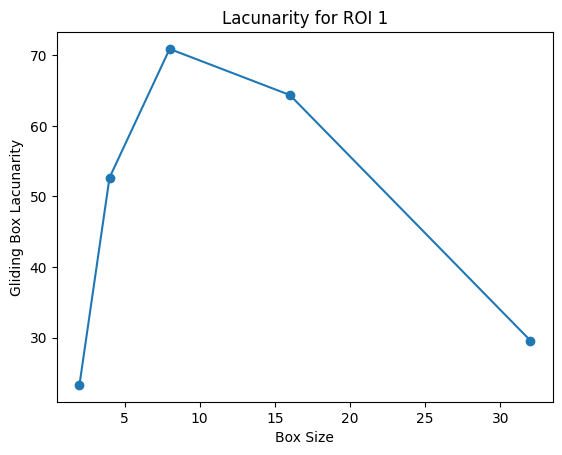

Lacunarity values for ROI 1: [23.28, 52.6512, 70.8976, 64.3632, 29.5724]


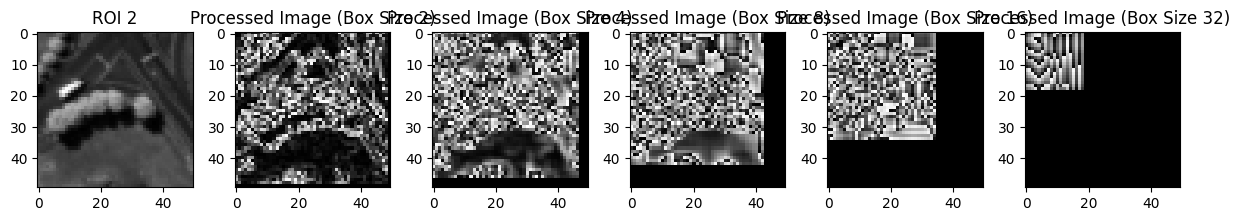

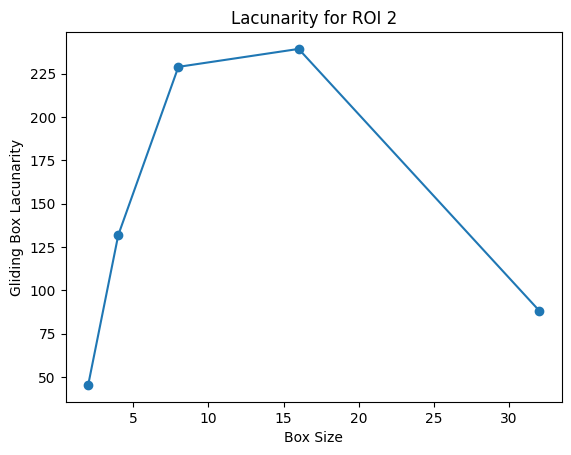

Lacunarity values for ROI 2: [45.3596, 131.8592, 228.9864, 239.3428, 88.3]


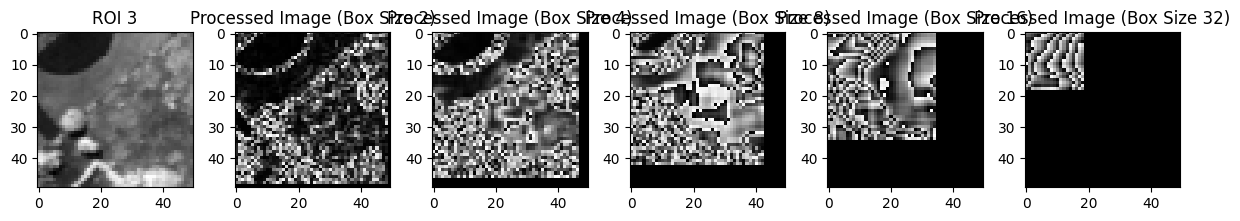

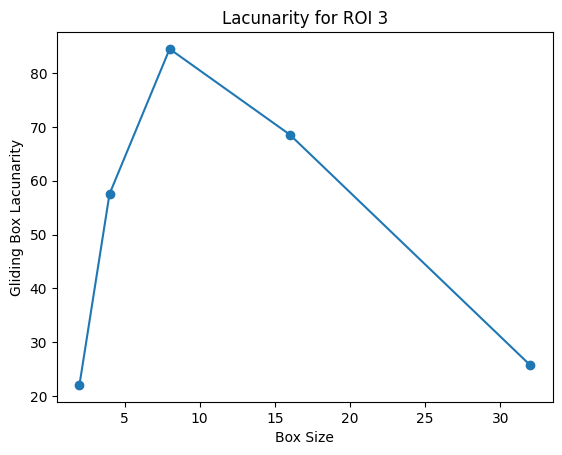

Lacunarity values for ROI 3: [22.0648, 57.5272, 84.4688, 68.5436, 25.7056]


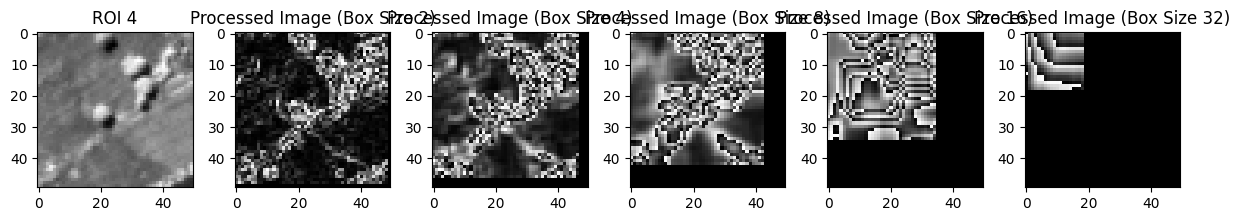

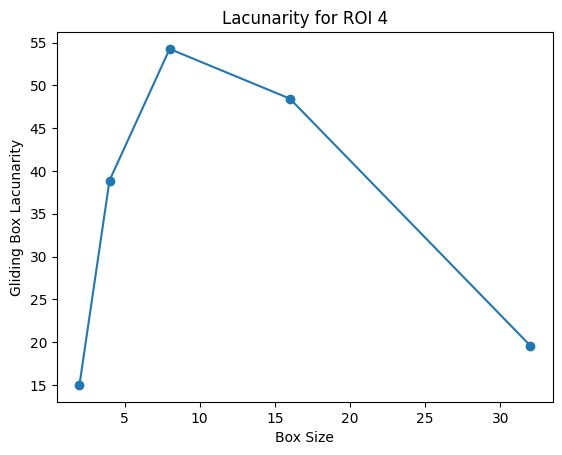

Lacunarity values for ROI 4: [14.994, 38.8804, 54.258, 48.4464, 19.5784]


In [ ]:
def gliding_box_lacunarity(data, box_sizes):
    lacunarity_values = []
    processed_images = []

    for size in box_sizes:
        lacunarity_map = np.zeros_like(data)
        processed_image = np.zeros_like(data)

        for i in range(data.shape[0] - size + 1):
            for j in range(data.shape[1] - size + 1):
                sub_img = data[i:i+size, j:j+size]
                unique_labels = np.unique(sub_img)
                if 0 in unique_labels:
                    unique_labels = unique_labels[1:]
                lacunarity_map[i, j] = np.var(unique_labels)/np.mean(unique_labels)
                processed_image[i, j] = np.var(sub_img)

        lacunarity_values.append(np.mean(lacunarity_map))
        processed_images.append(processed_image)

    return lacunarity_values, processed_images

band_91 = PaviaU[:, :, band_number]
height, width = band_91.shape

roi_params = [
    {"x": 0, "y": 0, "roi_width": 50, "roi_height": 50},
    {"x": 275, "y": 400, "roi_width": 50, "roi_height": 50},
    {"x": width - 50, "y": 0, "roi_width": 50, "roi_height": 50},
    {"x": 20, "y": 70, "roi_width": 50, "roi_height": 50}
]

box_sizes = [2, 4, 8, 16, 32]

for idx, params in enumerate(roi_params):
    x, y, roi_width, roi_height = params["x"], params["y"], params["roi_width"], params["roi_height"]
    roi = band_91[y:y+roi_height, x:x+roi_width]

    lacunarity_values, processed_images = gliding_box_lacunarity(roi, box_sizes)

    plt.figure(figsize=(12, 4))
    plt.subplot(1, len(box_sizes) + 1, 1)
    plt.imshow(roi, cmap='gray')
    plt.title(f'ROI {idx+1}')

    for i, size in enumerate(box_sizes):
        plt.subplot(1, len(box_sizes) + 1, i+2)
        plt.imshow(processed_images[i], cmap='gray')
        plt.title(f'Processed Image (Box Size {size})')

    plt.tight_layout()
    plt.show()

    plt.plot(box_sizes, lacunarity_values, marker='o')
    plt.xlabel('Box Size')
    plt.ylabel('Gliding Box Lacunarity')
    plt.title(f'Lacunarity for ROI {idx+1}')
    plt.show()
    print(f'Lacunarity values for ROI {idx+1}: {lacunarity_values}')

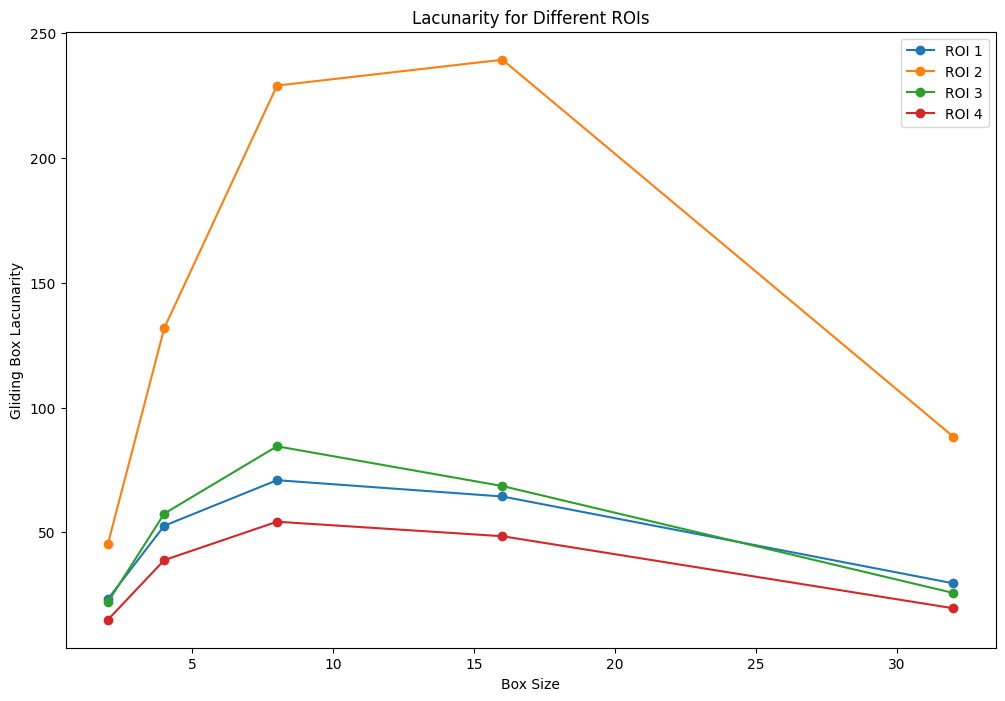

In [ ]:
def gliding_box_lacunarity(data, box_sizes):
    lacunarity_values = []
    processed_images = []

    for size in box_sizes:
        lacunarity_map = np.zeros_like(data)
        processed_image = np.zeros_like(data)

        for i in range(data.shape[0] - size + 1):
            for j in range(data.shape[1] - size + 1):
                sub_img = data[i:i+size, j:j+size]
                unique_labels = np.unique(sub_img)
                if 0 in unique_labels:
                    unique_labels = unique_labels[1:]
                lacunarity_map[i, j] = np.var(unique_labels)/np.mean(unique_labels)
                processed_image[i, j] = np.var(sub_img)

        lacunarity_values.append(np.mean(lacunarity_map))
        processed_images.append(processed_image)

    return lacunarity_values, processed_images

PaviaU_data = loadmat('/content/PaviaU.mat')
PaviaU = PaviaU_data['paviaU']

band_number = 91
band_91 = PaviaU[:, :, band_number]

height, width = band_91.shape

roi_params = [
    {"x": 0, "y": 0, "roi_width": 50, "roi_height": 50},
    {"x": 275, "y": 400, "roi_width": 50, "roi_height": 50},
    {"x": width - 50, "y": 0, "roi_width": 50, "roi_height": 50},
    {"x": 20, "y": 70, "roi_width": 50, "roi_height": 50}
]

box_sizes = [2, 4, 8, 16, 32]
all_lacunarity_values = []

for idx, params in enumerate(roi_params):
    x, y, roi_width, roi_height = params["x"], params["y"], params["roi_width"], params["roi_height"]
    roi = band_91[y:y+roi_height, x:x+roi_width]

    lacunarity_values, processed_images = gliding_box_lacunarity(roi, box_sizes)

    all_lacunarity_values.append(lacunarity_values)

plt.figure(figsize=(12, 8))

for idx, lacunarity_values in enumerate(all_lacunarity_values):
    plt.plot(box_sizes, lacunarity_values, marker='o', label=f'ROI {idx+1}')

plt.xlabel('Box Size')
plt.ylabel('Gliding Box Lacunarity')
plt.title('Lacunarity for Different ROIs')
plt.legend()
plt.show()